# Unsupervised approach to Tri Health Data

In [1]:
import pandas as pd

df = pd.read_csv('tri_health_data.csv')
df.head(5)

,Date,Sleep,Activity Type,Activity Duration,TSS,Weight,HRV,Steps,Cals_burnt,Cals,Carbs,Fats,Protein,Sensation
0,22/05/2017,7.1,"Swim, Run",125.0,154,87.7,NaN,13894.0,4600.0,3600.0,481.0,102.0,135.0,7.0
1,23/05/2017,6.3,Swim,45.0,78,NaN,NaN,12739.0,3459.0,3700.0,413.0,100.0,75.0,4.0
2,24/05/2017,6.7,NaN,NaN,0,NaN,NaN,3324.0,2629.0,2210.0,305.0,42.0,75.0,8.0
3,25/05/2017,7.6,"Swim, Gym",142.0,155,NaN,NaN,11532.0,4327.0,4580.0,392.0,89.0,175.0,7.0
4,26/05/2017,8.7,Run,68.0,60,NaN,NaN,10479.0,3363.0,3590.0,510.0,61.0,80.0,9.0


In [38]:
df5 = df[['Activity Type'==['Bike','Rest Day'],'Cals']]
df5

KeyError: '[False] not in index'

In [2]:
# 1. Drop the columns 'Fats', 'Carbs', and 'HRV'.
df.drop(columns=['Fats', 'Carbs', 'HRV'], inplace=True)

# 2. Forward-fill the missing values in the 'Weight' column.
df['Weight'].fillna(method='ffill', inplace=True)

# 3. Fill the missing values in the 'Protein' column with its median, or with 80 if the median is NaN.
protein_median = df['Protein'].median()
if pd.isna(protein_median):
    df['Protein'].fillna(value=80, inplace=True)
else:
    df['Protein'].fillna(value=protein_median, inplace=True)

# 4. Fill any missing values in the 'Cals' column with its 75th percentile value.
df['Cals'].fillna(value=df['Cals'].quantile(0.75), inplace=True)

# 5. Fill any missing values in the 'Sensation' column with its mean value.
df['Sensation'].fillna(value=df['Sensation'].mean(), inplace=True)

# 6. Identify and drop rows where 'Activity Duration' is NaN but 'Activity Type' is not NaN.
rows_to_drop = df[df['Activity Duration'].isna() & ~df['Activity Type'].isna()].index
rows_dropped_count = len(rows_to_drop)
df.drop(rows_to_drop, inplace=True)

# 7. change NaN to value 0
df['Activity Duration'].fillna(value=0, inplace=True)

df['Activity Type'].fillna(value='Rest_Day', inplace=True)

df = df.dropna(subset=['Sleep', 'Steps', 'Cals_burnt'])


rows_dropped_count

2

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Data Preprocessing
# a) Handling missing data
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = ['Activity Type']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

df_processed = pd.DataFrame(preprocessor.fit_transform(df))
df_processed

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.471531,1.365872,1.727208,0.018540,1.214816,1.755724,0.595689,2.868128,0.070048,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.402429,-0.415671,0.221949,0.018540,0.881668,0.173192,0.718274,-0.403587,-1.338906,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.936980,-1.417789,-1.322922,0.018540,-1.833995,-0.977992,-1.108251,-0.403587,0.539700,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.110280,1.744450,1.747014,0.018540,0.533521,1.377081,1.797027,5.049271,0.070048,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.390265,0.096522,-0.134560,0.018540,0.229794,0.040043,0.583430,-0.130944,1.009352,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,0.575729,-0.081632,-0.134560,1.380119,0.521407,0.110778,0.166639,-0.403587,1.479003,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1010,0.692092,-0.081632,0.004082,1.380119,0.383244,0.098296,-0.299186,-0.403587,0.539700,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1011,-1.053343,-1.417789,-1.322922,1.380119,-0.925120,-1.724182,-1.623111,-0.130944,-0.399603,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1012,1.041178,-0.081632,0.023888,1.380119,0.551693,0.289697,0.816343,-0.130944,1.009352,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


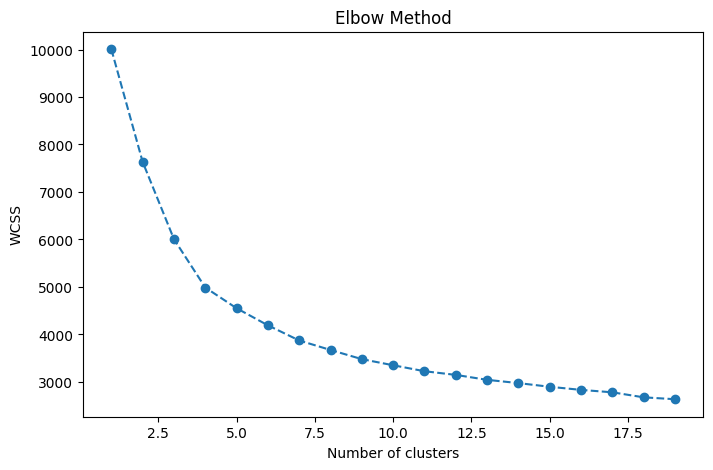

In [4]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_processed)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 20), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [5]:
from sklearn.metrics import silhouette_score

silhouette_score(df_processed, kmeans.labels_)

0.1659214774186199

In [6]:
kmeans.labels_

array([ 7, 16,  9, ...,  9,  0, 11], dtype=int32)

# Classification of overtraining 

## Learning if over training without the cost of HRV tech

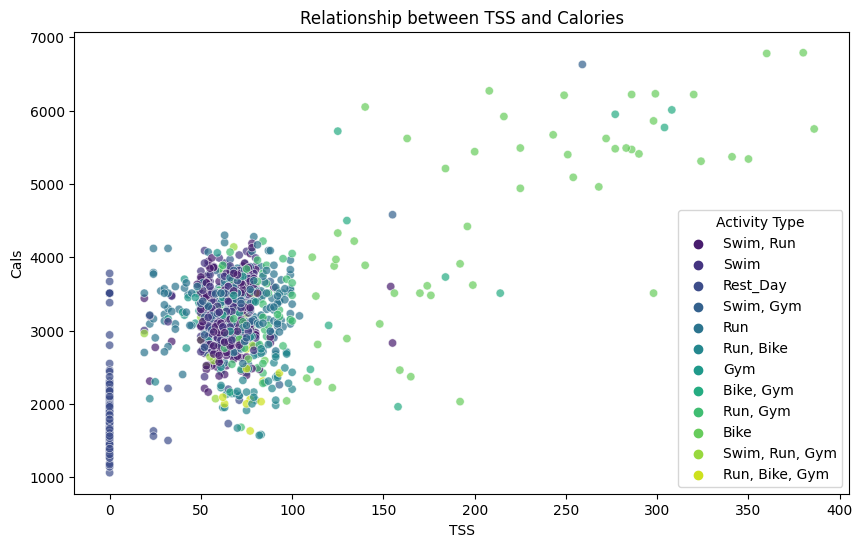

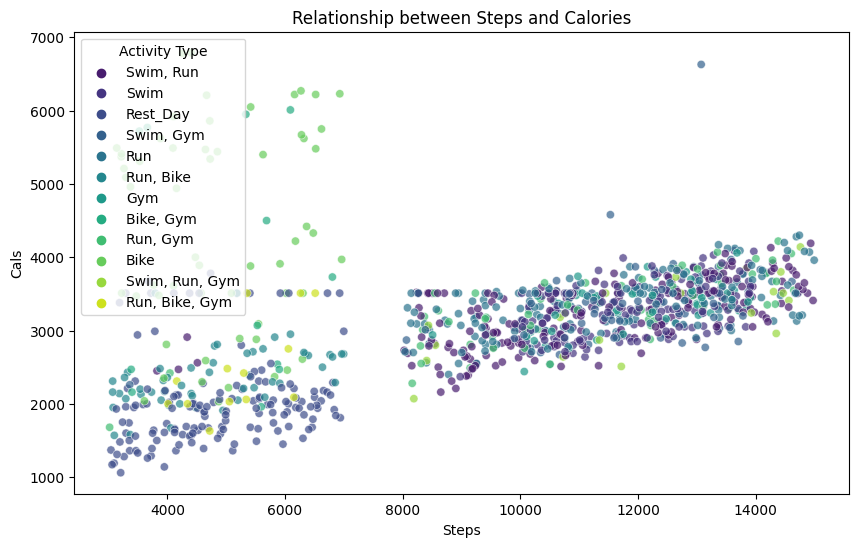

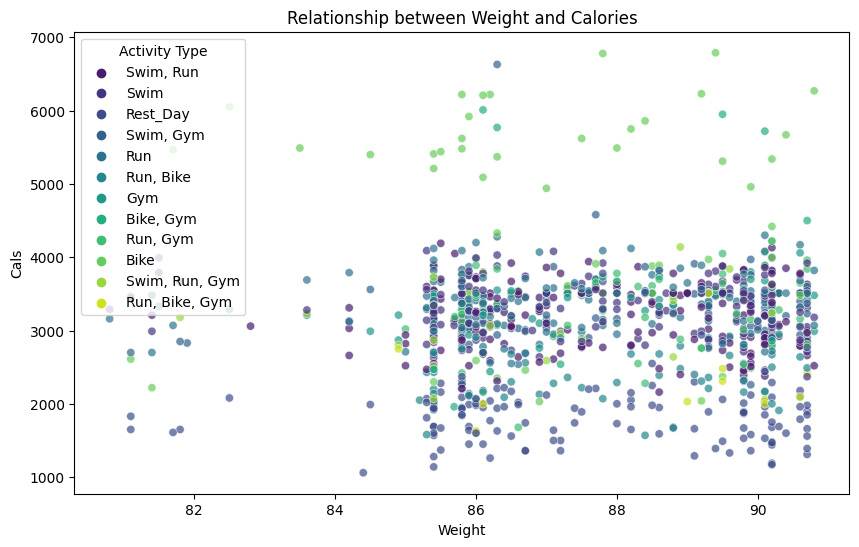

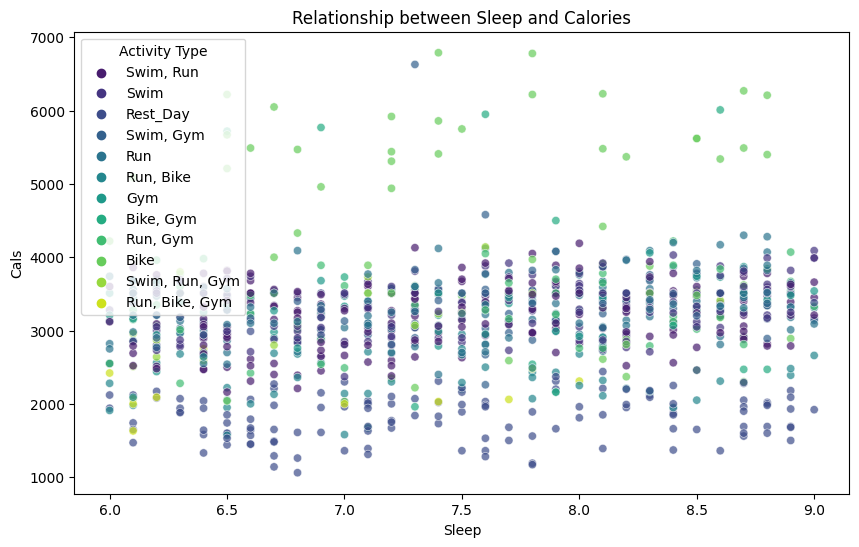

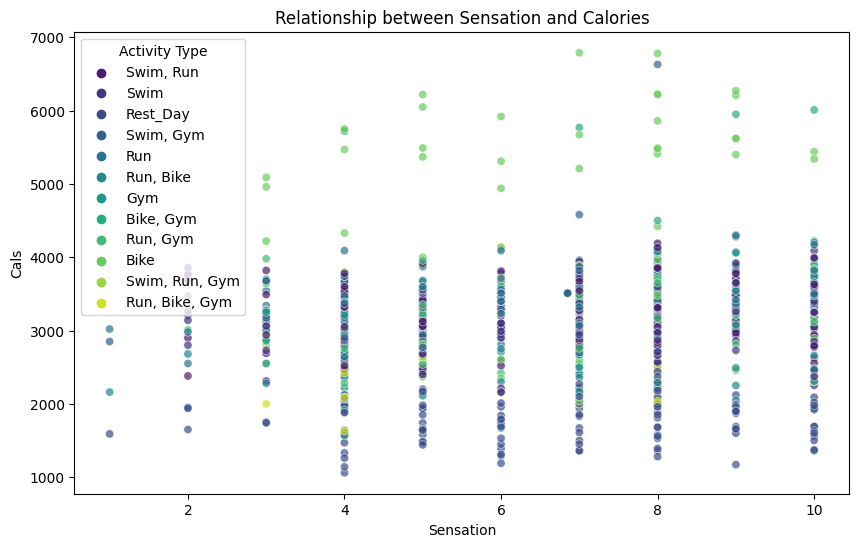

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

variables_of_interest = ['TSS', 'Steps', 'Weight', 'Sleep', 'Sensation']

for var in variables_of_interest:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=var, y='Cals', hue='Activity Type', palette='viridis', alpha=0.7)
    plt.title(f'Relationship between {var} and Calories')
    plt.show()

# Alternatively, for a holistic view, you can use pair plots:
# sns.pairplot(df, vars=['Calories'] + variables_of_interest, hue='Activity Type')

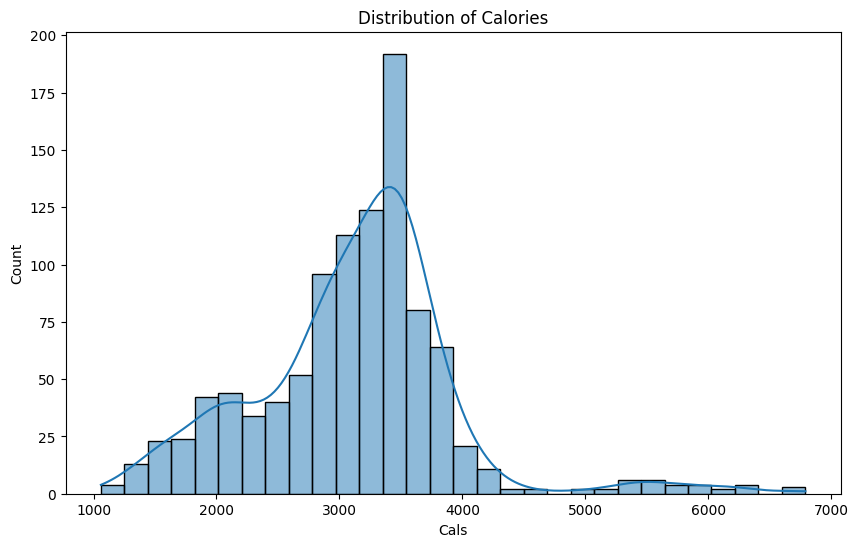

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Cals'], kde=True, bins=30)
plt.title('Distribution of Calories')
plt.show()

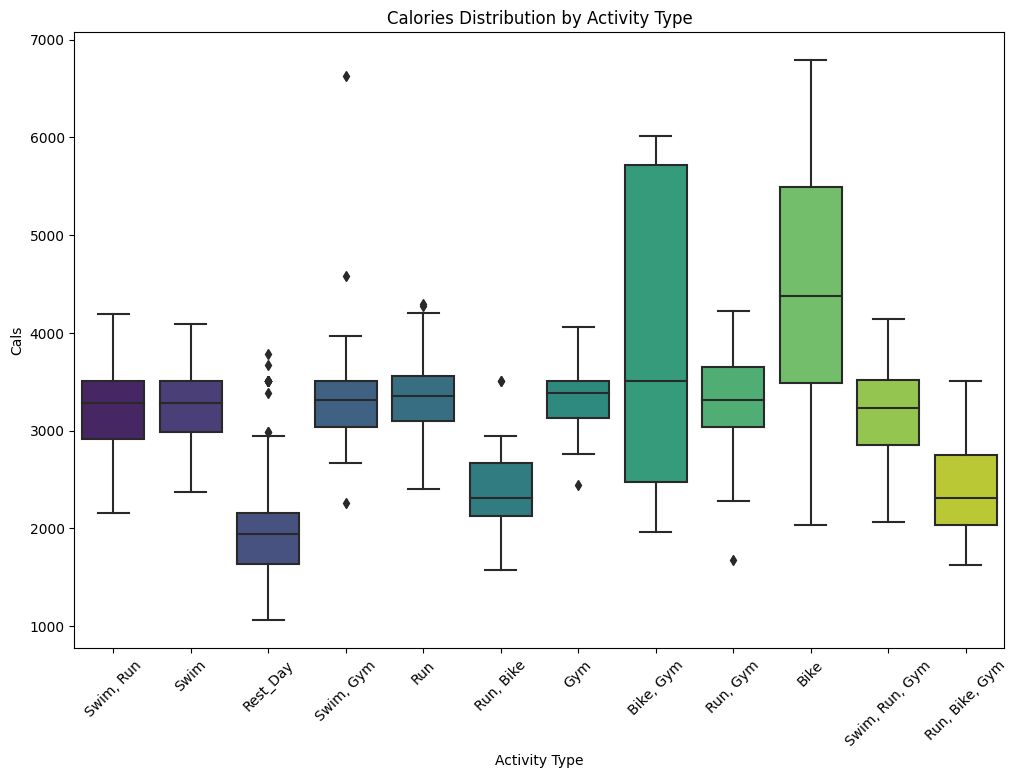

In [9]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Activity Type', y='Cals', palette='viridis')
plt.title('Calories Distribution by Activity Type')
plt.xticks(rotation=45)  # rotate x-axis labels for better visibility if they're lengthy
plt.show()

In [10]:
grouped_data = df.groupby('Activity Type').agg({
    'TSS': 'mean',
    'Steps': 'mean',
    'Cals': 'mean',
    'Weight': 'mean',
    'Sleep': 'mean',
    'Sensation': 'mean'
}).reset_index()

print(grouped_data)


     Activity Type         TSS         Steps         Cals     Weight  \
0             Bike  202.241379   4933.379310  4424.137931  87.231034   
1        Bike, Gym  163.692308   5074.461538  3835.384615  87.553077   
2              Gym   60.727273  11887.509091  3322.909091  87.392727   
3         Rest_Day    3.758389   4878.590604  2013.959732  87.622148   
4              Run   68.023810  11514.660714  3348.154762  87.552917   
5        Run, Bike   79.509434   4787.471698  2369.811321  87.722642   
6   Run, Bike, Gym   75.538462   5253.461538  2484.615385  88.646154   
7         Run, Gym   79.034483  11198.827586  3302.758621  88.056724   
8             Swim   63.185714  11872.185714  3285.428571  87.802071   
9        Swim, Gym   68.985714  11651.700000  3344.857143  87.674286   
10       Swim, Run   64.069124  11340.995392  3217.373272  87.759908   
11  Swim, Run, Gym   59.250000  12015.050000  3207.000000  86.830000   

       Sleep  Sensation  
0   7.603448   7.038807  
1   7.78461

NameError: name 'count_date' is not defined

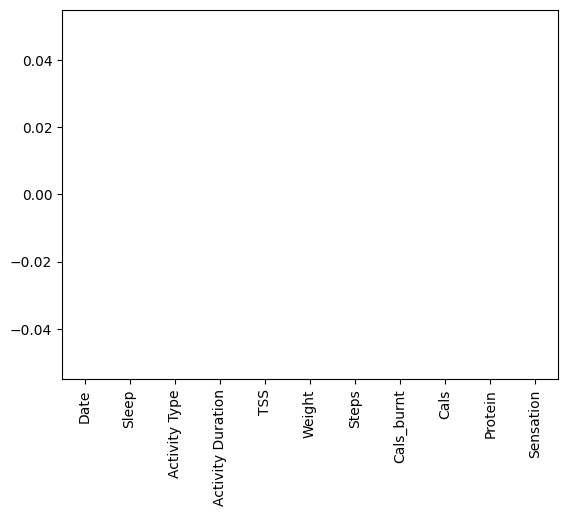

In [11]:
nan_counts = df.isna().sum()

# Plotting the NaN counts
nan_counts.plot(kind='bar', color='skyblue')
plt.title(f'Number of NaN values in each column / {count_date}')
plt.ylabel('Count')
plt.xlabel('Column Name')
plt.show()

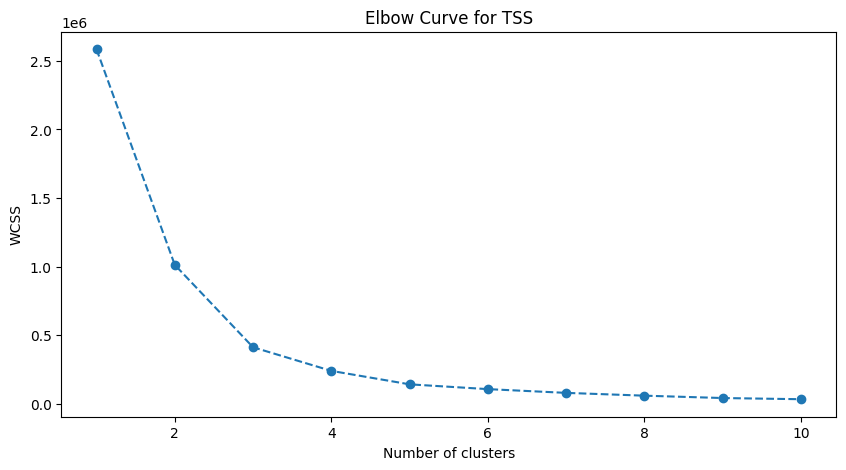

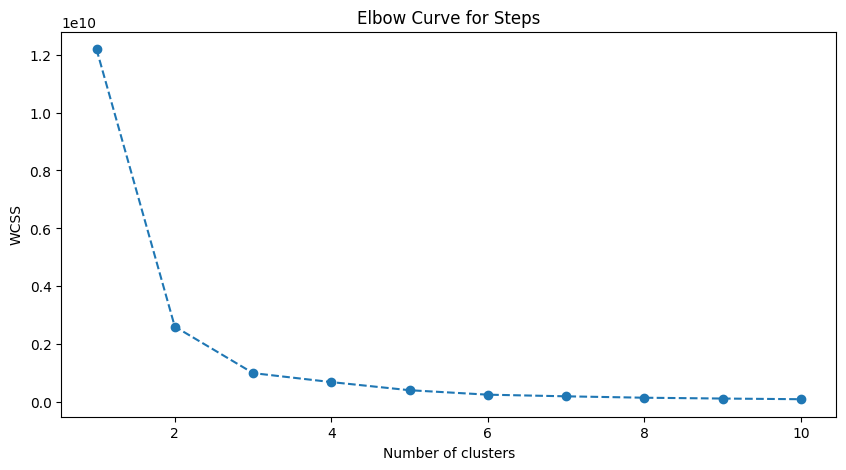

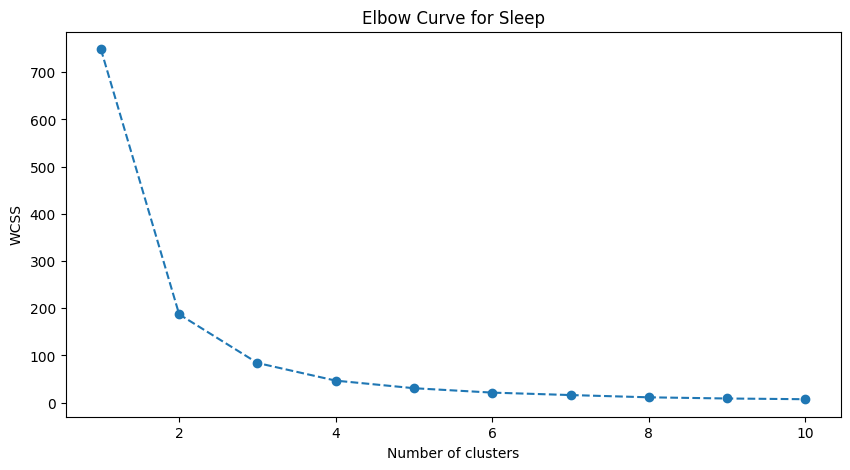

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features_to_bin = ['TSS', 'Steps', 'Sleep']
scaled_data = StandardScaler().fit_transform(df[features_to_bin])

elbow_data = {}
for feature in features_to_bin:
    wcss = []
    for i in range(1, 11):  # trying out 1 to 10 clusters
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(df[[feature]])
        wcss.append(kmeans.inertia_)
    elbow_data[feature] = wcss

# Plotting the elbow curves for each feature
for feature, wcss in elbow_data.items():
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
    plt.title(f'Elbow Curve for {feature}')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()


In [13]:
# Example binning for TSS
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df['TSS_bins'] = kmeans.fit_predict(df[['TSS']])
df['TSS_bins'] = df['TSS_bins'].map({0: 'low', 1: 'medium', 2: 'high'})  # replace cluster numbers with labels


kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df['Steps_bins'] = kmeans.fit_predict(df[['Steps']])
df['Steps_bins'] = df['Steps_bins'].map({0: 'low', 1: 'medium', 2: 'high'})  # replace cluster numbers with labels

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df['Sleep_bins'] = kmeans.fit_predict(df[['Sleep']])
df['Sleep_bins'] = df['Sleep_bins'].map({0: 'low', 1: 'medium', 2: 'high'})  # replace cluster numbers with labels
# Repeat similar steps for `Steps` and `Sleep` based on their elbow plots


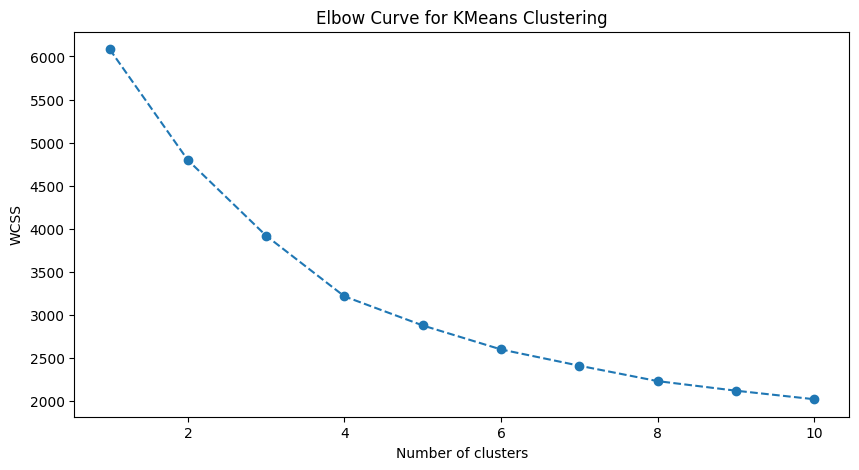

In [14]:
from sklearn.preprocessing import LabelEncoder

# If Activity Type is categorical, encode it
le = LabelEncoder()
df['Activity_Type_Encoded'] = le.fit_transform(df['Activity Type'])

# Selecting features for clustering
features_for_clustering = ['TSS', 'Steps', 'Weight', 'Sleep', 'Sensation', 'Activity_Type_Encoded']

# Scaling the data
scaled_data_clustering = StandardScaler().fit_transform(df[features_for_clustering])

# Using the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data_clustering)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Curve for KMeans Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [15]:
optimal_clusters = 4  # Replace with the number you deduce from the Elbow Curve
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data_clustering)


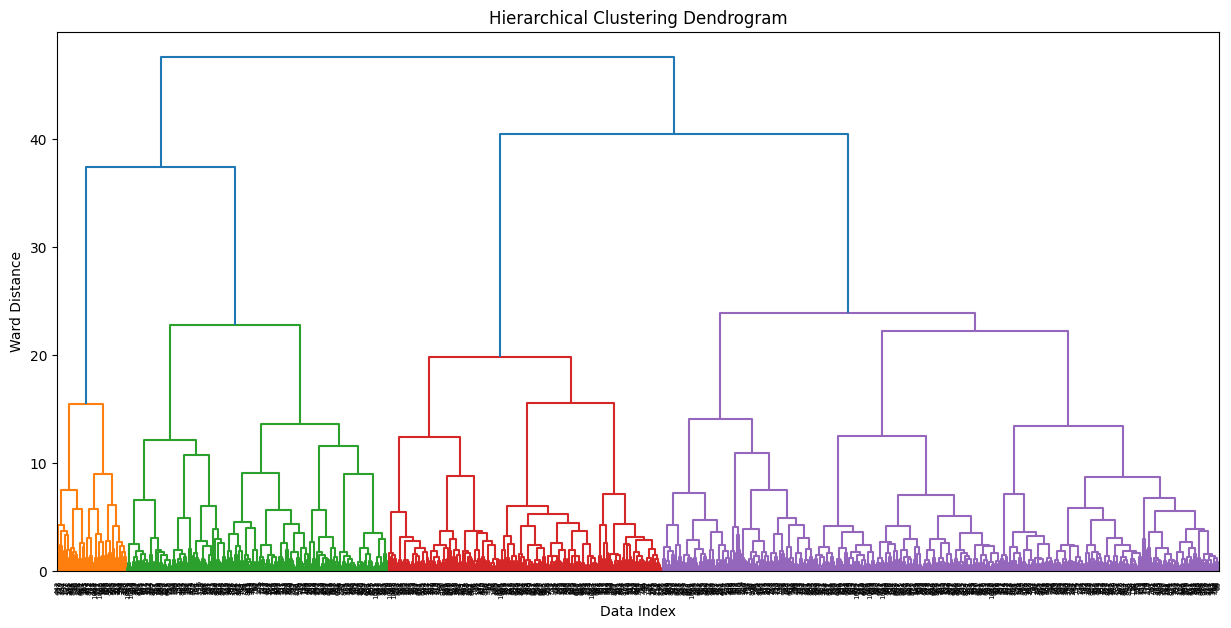

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Using Ward linkage for Hierarchical Clustering
linked = linkage(scaled_data_clustering, 'ward')

plt.figure(figsize=(15, 7))
dendrogram(linked, orientation='top')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Index')
plt.ylabel('Ward Distance')
plt.show()


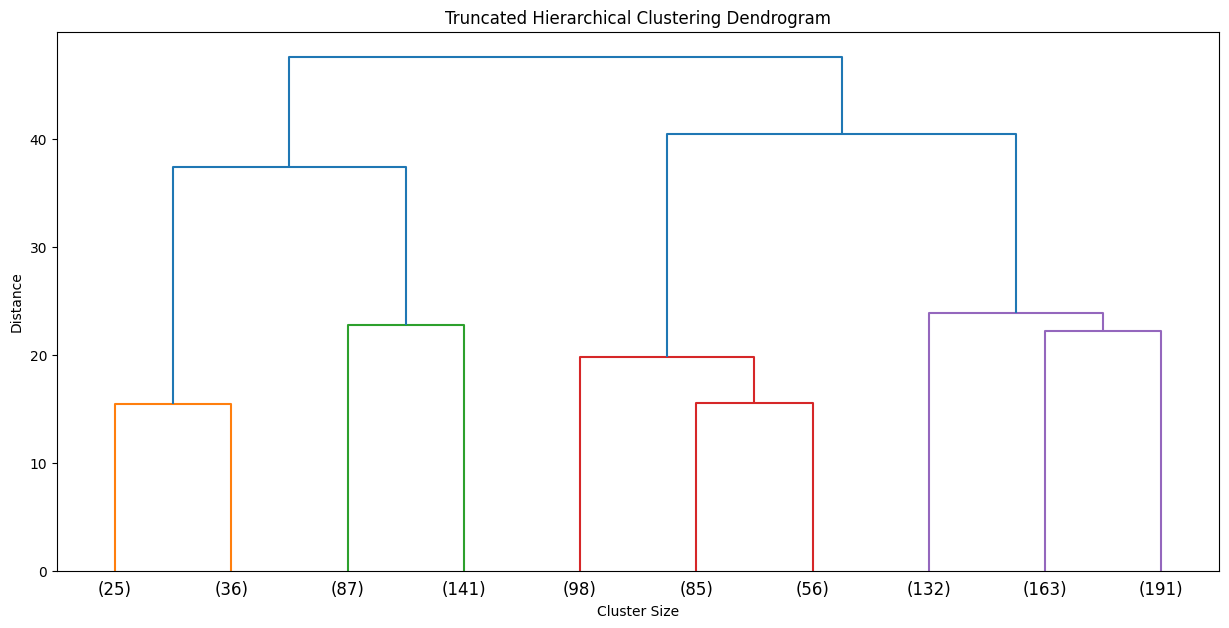

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Using Ward linkage for Hierarchical Clustering
linked = linkage(scaled_data_clustering, 'ward')

plt.figure(figsize=(15, 7))
dendrogram(linked, orientation='top', truncate_mode='lastp', p=10, show_leaf_counts=True)  # Show only the last 10 merged clusters
plt.title('Truncated Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

In [18]:
for column in ["TSS_bins", "Steps_bins", "Sleep_bins"]:
    print(df[column].value_counts())
    print("-------------------------")


medium    793
low       181
high       40
Name: TSS_bins, dtype: int64
-------------------------
low       383
high      338
medium    293
Name: Steps_bins, dtype: int64
-------------------------
medium    362
high      336
low       316
Name: Sleep_bins, dtype: int64
-------------------------


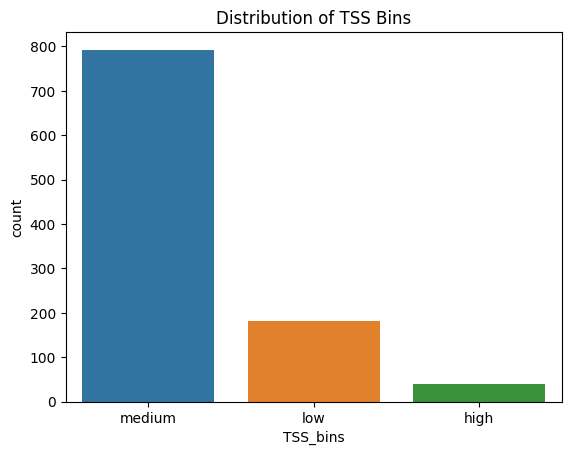

In [19]:
import seaborn as sns

sns.countplot(data=df, x='TSS_bins').set_title('Distribution of TSS Bins')
plt.show()


In [20]:
cross_tab = pd.crosstab(df['TSS_bins'], df['Activity Type'])
print(cross_tab)


Activity Type  Bike  Bike, Gym  Gym  Rest_Day  Run  Run, Bike  Run, Bike, Gym  \
TSS_bins                                                                        
high             34          5    0         0    0          0               0   
low               0          0    1       143   24          2               0   
medium           24          8   54         6  144         51              13   

Activity Type  Run, Gym  Swim  Swim, Gym  Swim, Run  Swim, Run, Gym  
TSS_bins                                                             
high                  0     0          1          0               0  
low                   0     3          1          6               1  
medium               58   137         68        211              19  


In [21]:
df

,Date,Sleep,Activity Type,Activity Duration,TSS,Weight,Steps,Cals_burnt,Cals,Protein,Sensation,TSS_bins,Steps_bins,Sleep_bins,Activity_Type_Encoded,Cluster
0,22/05/2017,7.1,"Swim, Run",125.0,154,87.7,13894.0,4600.0,3600.0,135.0,7.0,medium,low,high,10,2
1,23/05/2017,6.3,Swim,45.0,78,87.7,12739.0,3459.0,3700.0,75.0,4.0,medium,low,low,8,2
2,24/05/2017,6.7,Rest_Day,0.0,0,87.7,3324.0,2629.0,2210.0,75.0,8.0,low,medium,low,3,0
3,25/05/2017,7.6,"Swim, Gym",142.0,155,87.7,11532.0,4327.0,4580.0,175.0,7.0,medium,high,high,9,1
4,26/05/2017,8.7,Run,68.0,60,87.7,10479.0,3363.0,3590.0,80.0,9.0,medium,high,medium,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,16/03/2020,8.0,Swim,60.0,60,90.6,11490.0,3414.0,3250.0,75.0,10.0,medium,high,medium,8,1
1030,17/03/2020,8.1,Swim,60.0,67,90.6,11011.0,3405.0,2870.0,75.0,8.0,medium,high,medium,8,1
1031,18/03/2020,6.6,Rest_Day,0.0,0,90.6,6475.0,2091.0,1790.0,80.0,6.0,low,medium,low,3,0
1032,19/03/2020,8.4,"Swim, Run",60.0,68,90.6,11595.0,3543.0,3780.0,80.0,9.0,medium,low,medium,10,1


# following Le Wagon method

<AxesSubplot:>

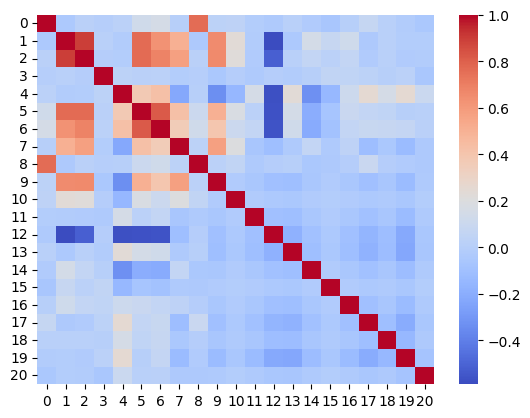

In [22]:
import seaborn as sns

sns.heatmap(pd.DataFrame(df_processed).corr(), cmap='coolwarm')

In [23]:
## Comput Picincpal Components 

In [24]:
df_processedWG = df_processed

In [25]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_processedWG)

PCA()

In [28]:
X_proj = pca.transform(df_processedWG)
X_proj = pd.DataFrame(X_proj, columns=[f'PC{i}' for i in range(1, 22)])
X_proj

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
0,3.575550,0.696149,0.137483,-0.020215,1.724885,-1.088764,-0.861740,-0.336626,-0.388122,0.256080,...,-0.222489,-0.018846,0.028950,0.171207,0.024383,0.094287,0.343430,0.088244,-0.192165,6.556986e-17
1,0.142374,1.501099,-1.621520,0.117151,0.181960,0.234368,0.493634,0.038551,0.841963,0.087576,...,0.041569,0.003759,-0.045319,0.150233,-0.087443,-0.040278,-0.132090,0.019083,0.057911,1.011317e-16
2,-2.702122,0.321988,1.360162,-0.169012,0.055405,-0.225887,1.274660,0.104602,-0.337010,0.573175,...,-0.038102,0.007793,-0.010172,0.156243,-0.123241,-0.013193,-0.115565,-0.008812,-0.055846,-5.152397e-17
3,4.762554,0.652404,1.551719,-0.143398,3.224739,-0.233211,-0.488944,-0.246860,0.460763,-0.227510,...,-0.426440,0.671327,-0.070714,-0.084764,-0.102821,0.192086,0.433743,0.039379,-0.334443,-3.429575e-16
4,0.403452,-1.742155,0.004704,0.011002,-0.027376,0.386859,0.082944,0.302173,-0.278762,-0.651453,...,0.375748,0.059334,-0.034153,-0.192404,0.038407,0.030658,0.123812,-0.032572,-0.046617,3.174275e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,0.091096,-1.609210,-0.430995,-1.337208,-0.143277,-0.643367,0.338573,0.226346,0.679450,0.163841,...,0.232384,0.060551,0.012395,-0.048589,-0.015860,-0.011365,-0.010180,-0.026144,-0.017556,-1.209129e-16
1010,-0.115501,-0.973638,-0.358922,-1.346928,-0.254079,-0.202151,-0.313031,0.378292,0.667908,0.191341,...,0.146947,0.051911,0.017497,-0.057561,-0.042363,0.005986,-0.025769,-0.030605,-0.032809,-6.540176e-17
1011,-3.150755,1.001136,0.706455,-1.476514,0.542873,-0.232622,0.380700,0.054595,-0.010746,0.092638,...,-0.199391,-0.079652,-0.029045,-0.069203,0.188447,-0.040102,0.202283,-0.003490,0.054196,-2.180574e-16
1012,0.627964,-1.607424,-0.542492,-1.324734,0.055222,0.036888,-0.001584,-0.818848,-0.268753,0.037393,...,0.089827,0.019189,0.005527,0.045358,-0.011054,0.002983,-0.021307,0.006901,-0.008258,-2.674970e-16


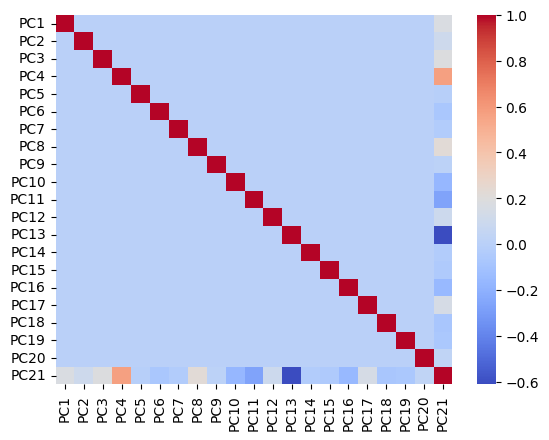

In [29]:
sns.heatmap(X_proj.corr(), cmap='coolwarm');

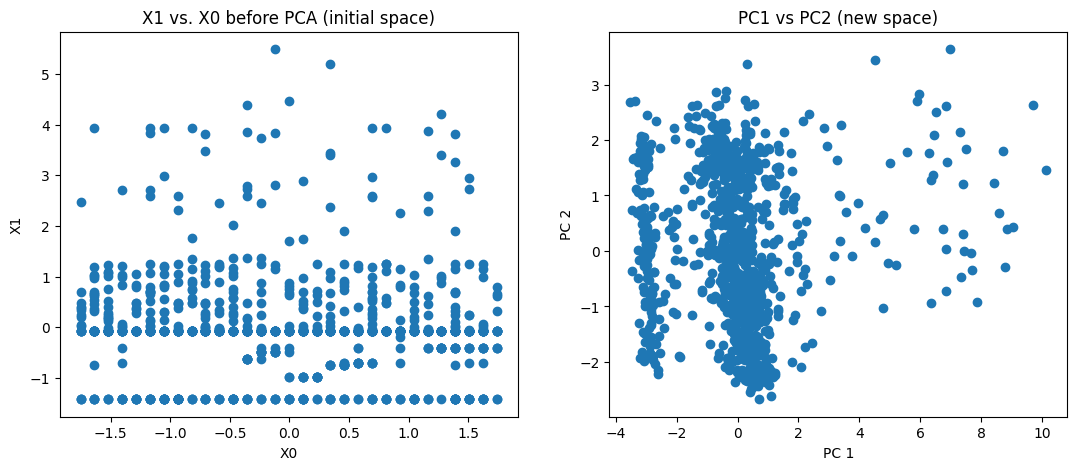

In [30]:
# 2D-slice

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.title('X1 vs. X0 before PCA (initial space)'); plt.xlabel('X0'); plt.ylabel('X1')
plt.scatter(df_processedWG.iloc[:,0], df_processedWG.iloc[:,1])

plt.subplot(1,2,2)
plt.title('PC1 vs PC2 (new space)'); plt.xlabel('PC 1'); plt.ylabel('PC 2')
plt.scatter(X_proj.iloc[:,0], X_proj.iloc[:,1]);

In [31]:
from sklearn.cluster import KMeans

# Fit K-means
km = KMeans(n_clusters=3)
km.fit(X_proj)

KMeans(n_clusters=3)

In [32]:
# The 3 centroids' coordinates (expressed in the space of PCs)
km.cluster_centers_.shape

(3, 21)

In [33]:
# The 177 observations are classified automatically
km.labels_

array([0, 1, 2, ..., 2, 1, 2], dtype=int32)

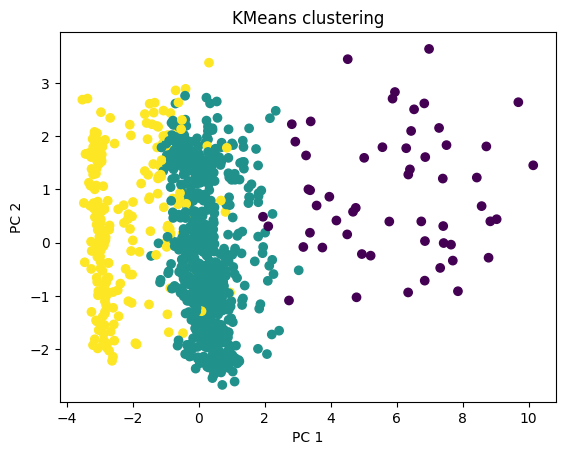

In [34]:
plt.scatter(X_proj.iloc[:,0], X_proj.iloc[:,1], c=km.labels_)
plt.title('KMeans clustering'); plt.xlabel('PC 1'); plt.ylabel('PC 2');

NameError: name 'y' is not defined

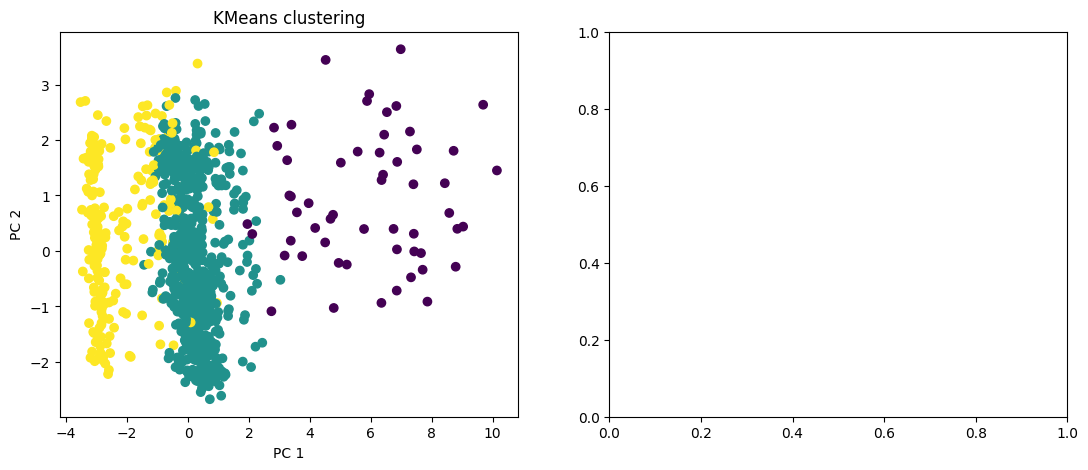

In [35]:
# Visualization
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
plt.scatter(X_proj.iloc[:,0], X_proj.iloc[:,1], c=km.labels_)
plt.title('KMeans clustering'); plt.xlabel('PC 1'); plt.ylabel('PC 2')

plt.subplot(1,2,2)
plt.scatter(X_proj.iloc[:,0], X_proj.iloc[:,1], c=y)
plt.title('True wine labels'); plt.xlabel('PC 1'); plt.ylabel('PC 2');

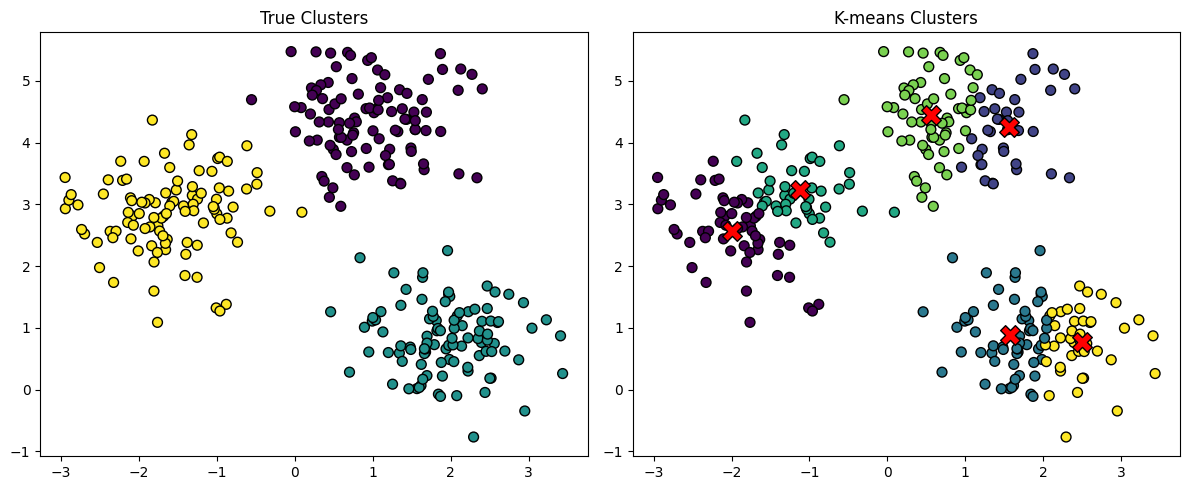

In [36]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic dataset with 3 clusters
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Use K-means to cluster the data
kmeans = KMeans(n_clusters=6)
y_kmeans = kmeans.fit_predict(X)

# Visualize the true clusters and the clusters identified by K-means
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# True clusters
ax[0].scatter(X[:, 0], X[:, 1], c=y_true, s=50, cmap='viridis', edgecolor='k')
ax[0].set_title('True Clusters')

# Clusters identified by K-means
ax[1].scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', edgecolor='k')
ax[1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', edgecolor='k')
ax[1].set_title('K-means Clusters')

plt.tight_layout()
plt.show()
